In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('Mau_hist.csv')
data.head(2)

,gdp,gdp_growth,gpc,gpc_growth,pop,EPI,EPI_P
0,8802441342,5.727016,7100.861823,5.246497,1239630,73.85,73.85
1,9276625562,5.386963,7456.369246,5.006539,1244121,74.32,73.85


In [50]:
beta_epi = 0.9
beta_gdp = 0.9
K_EPI = 120

In [51]:
economics = ['gdp','gdp_growth','gpc','gpc_growth']
metadata = {idx:{'mean':float('nan'), 'std':float('nan')} for idx in economics}

In [52]:
for c in economics:
    metadata[c]['mean'] = np.mean(data[c])
    metadata[c]['std'] = np.std(data[c])

In [53]:
for c in economics:
    scaled = (data[c]-metadata[c]['mean']) / (metadata[c]['std'])
    data[c+'_scaled'] = scaled
data.head(2)

,gdp,gdp_growth,gpc,gpc_growth,pop,EPI,EPI_P,gdp_scaled,gdp_growth_scaled,gpc_scaled,gpc_growth_scaled
0,8802441342,5.727016,7100.861823,5.246497,1239630,73.85,73.85,-1.584182,2.045893,-1.580204,1.944092
1,9276625562,5.386963,7456.369246,5.006539,1244121,74.32,73.85,-1.164225,1.624673,-1.161873,1.614898


In [55]:
for c in economics:
    sig = 1/(1+np.exp(data[c+'_scaled']))
    data[c+'_sigmoid'] = sig
data.head(2)

,gdp,gdp_growth,gpc,gpc_growth,pop,EPI,EPI_P,gdp_scaled,gdp_growth_scaled,gpc_scaled,gpc_growth_scaled,gdp_sigmoid,gdp_growth_sigmoid,gpc_sigmoid,gpc_growth_sigmoid
0,8802441342,5.727016,7100.861823,5.246497,1239630,73.85,73.85,-1.584182,2.045893,-1.580204,1.944092,0.829796,0.114468,0.829233,0.125199
1,9276625562,5.386963,7456.369246,5.006539,1244121,74.32,73.85,-1.164225,1.624673,-1.161873,1.614898,0.762100,0.164561,0.761673,0.165910


In [59]:
data_sigmoid = data[np.concatenate(([c+'_sigmoid' for c in economics],['EPI_P']))]
Y = data['EPI']
data_sigmoid.head(2)

,gdp_sigmoid,gdp_growth_sigmoid,gpc_sigmoid,gpc_growth_sigmoid,EPI_P
0,0.829796,0.114468,0.829233,0.125199,73.85
1,0.762100,0.164561,0.761673,0.165910,73.85


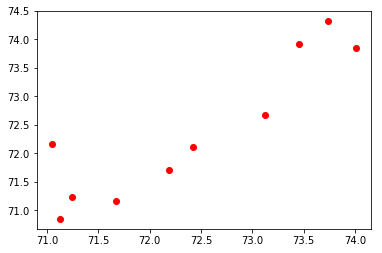

In [65]:
from sklearn.linear_model import LinearRegression
lin_mod = LinearRegression()

lin_mod.fit(data_sigmoid, Y)
pred = lin_mod.predict(data_sigmoid)
plt.plot(pred,Y,'ro')
plt.show()

In [66]:
def gdp_growth_next(gdp_growth):
    return np.exp(-gdp_growth)

In [79]:
last = data.loc[data.index[-1],:]

In [82]:
years_to = 20
future = pd.DataFrame()
future = future.append(last)

In [81]:
for idx in range(years_to):
    last = fut

""
